<a href="https://colab.research.google.com/github/jmmiddour/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



### Part 1A:

Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 

In [0]:
# Create a function to calculate the probability that a person is drunk given
#   a number of positive breathalyer test(s):
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, 
                              true_positive_rate):
  prob_not_drunk = 1 - prob_drunk_prior
  numerator = true_positive_rate * prob_drunk_prior  
  denominator = (true_positive_rate * prob_drunk_prior) + (false_positive_rate * prob_not_drunk)
  posterior_prob = numerator / denominator
  return posterior_prob
  

What is the probability that a person is drunk after one positive breathalyzer test?

In [2]:
# One positive breathalyzer test:
test1 = prob_drunk_given_positive(1/1000, .08, 1)
test1

0.012357884330202669

### Part 1B:

What is the probability that a person is drunk after two positive breathalyzer tests?

In [3]:
# Two positive breathalyzer tests:
test2 = prob_drunk_given_positive(test1, .08, 1)
test2

0.13525210993291495

### Part 1C:

How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

  - Need 4 positive breathalyzer tests in order to get a 96% probability that the person is truly drunk.

In [4]:
# Three positive breathalyzer tests:
test3 = prob_drunk_given_positive(test2, .08, 1)
test3

0.6615996951348605

In [5]:
# Four positive breathalyzer tests:
test4 = prob_drunk_given_positive(test3, .08, 1)
test4

0.9606895076105054

### Part 2A:

Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)

In [6]:
# Import my libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# Get the dataset:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-29 00:29:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-05-29 00:29:42 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [8]:
# Make it into a dataframe:
column_headers = ['Party','Handicapped-Infants','Water-Project',
                          'Budget','Physician-Fee-Freeze', 'El-Salvador-Aid',
                          'Religious-Groups','Anti-Satellite-Ban',
                          'Aid-to-Contras','Mx-Missile','Immigration',
                          'Synfuels', 'Education', 'Right-to-Sue','Crime','Duty-Free',
                          'South-Africa']

# You can see right away that the missing values were coded with a ?. To remove
#   those and set them to NaN values, need to add na_values='?':
house = pd.read_csv('house-votes-84.data', header=None, names=column_headers, 
                    na_values='?')
house.head()


,Party,Handicapped-Infants,Water-Project,Budget,Physician-Fee-Freeze,El-Salvador-Aid,Religious-Groups,Anti-Satellite-Ban,Aid-to-Contras,Mx-Missile,Immigration,Synfuels,Education,Right-to-Sue,Crime,Duty-Free,South-Africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [9]:
# Recode votes as numerical values:
house = house.replace({'y': 1, 'n': 0})

# Check my work by looking at the first 5 row:
house.head()

,Party,Handicapped-Infants,Water-Project,Budget,Physician-Fee-Freeze,El-Salvador-Aid,Religious-Groups,Anti-Satellite-Ban,Aid-to-Contras,Mx-Missile,Immigration,Synfuels,Education,Right-to-Sue,Crime,Duty-Free,South-Africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [10]:
# Remove NaN values:
house = house.dropna()

# Check my work:
house.isnull().sum()

Party                   0
Handicapped-Infants     0
Water-Project           0
Budget                  0
Physician-Fee-Freeze    0
El-Salvador-Aid         0
Religious-Groups        0
Anti-Satellite-Ban      0
Aid-to-Contras          0
Mx-Missile              0
Immigration             0
Synfuels                0
Education               0
Right-to-Sue            0
Crime                   0
Duty-Free               0
South-Africa            0
dtype: int64

In [11]:
# View value counts on the Immigration bill:
house['Immigration'].value_counts()

1.0    128
0.0    104
Name: Immigration, dtype: int64

In [12]:
# Subset the yes and no votes for the Immigration bill:
Yes = house.loc[:, ['Immigration']] >= 1
No = house.loc[:, ['Immigration']] <= 0

# Check my work:
print (Yes.head())
print (No.head())

    Immigration
5         False
8         False
19        False
23        False
25         True
    Immigration
5          True
8          True
19         True
23         True
25        False


In [0]:
# Create a function to calculate my confidence interval:
def confidence_interval(data, confidence=0.95):
    # Convert the data to an array.
    data = np.array(data)
    # The mean of the data.
    mean = np.mean(data)
    # Lenth of the sample data.
    n = len(data)
    # Standard Diviation error.
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    # Margin of Error:
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1) 
    # Returns the Mean, Lower Bound, Upper Bound.
    return (mean, mean - moe, mean + moe)

In [14]:
# Use my CI function to determine the CI of house yes votes on the Immigration 
#   bill:
mean, lower, upper = confidence_interval(Yes)
print ('Yes Votes:')
yes_mean = mean
print ('Mean: ', yes_mean)
print ('Lower Bounds: ', lower)
yes_upper = upper
print ('Upper Bounds: ', yes_upper)
print ('')
mean, lower, upper = confidence_interval(No)
print ('No Votes:')
no_mean = mean
print ('Mean: ', no_mean)
print ('Lower Bounds: ', lower)
no_upper = upper
print ('Upper Bounds: ', no_upper)

Yes Votes:
Mean:  0.5517241379310345
Lower Bounds:  0.48725422311179667
Upper Bounds:  0.6161940527502723

No Votes:
Mean:  0.4482758620689655
Lower Bounds:  0.3838059472497277
Upper Bounds:  0.5127457768882033


In [15]:
# Use bayes_mvs to determine the CI using Bayesian Theorem for house yes votes 
#   on the Immigration bill:
mean, varience, std_dev = stats.bayes_mvs(Yes, alpha=.95)
print ('Yes Votes:')
print (mean)
print (varience)
print (std_dev)
print ('')
# Use bayes_mvs to determine the CI using Bayesian Theorem for house no votes 
#   on the Immigration bill:
mean, varience, std_dev = stats.bayes_mvs(No, alpha=.95)
print ('No Votes:')
print (mean)
print (varience)
print (std_dev)

Yes Votes:
Mean(statistic=0.5517241379310345, minmax=(0.48725422311179667, 0.6161940527502723))
Variance(statistic=0.2505646739948803, minmax=(0.2086603793764202, 0.3007344885194001))
Std_dev(statistic=0.5000181877773174, minmax=(0.4567935850867657, 0.5483926408326429))

No Votes:
Mean(statistic=0.4482758620689655, minmax=(0.3838059472497277, 0.5127457768882033))
Variance(statistic=0.2505646739948803, minmax=(0.2086603793764202, 0.3007344885194001))
Std_dev(statistic=0.5000181877773174, minmax=(0.4567935850867657, 0.5483926408326429))


In [16]:
# Calculate the MOE for house yes and no votes on the Immigration bill:
yes_moe = yes_upper - yes_mean
no_moe = no_upper - no_mean

# Check my work:
print ('Yes MOE: ', yes_moe)
print ('No MOE: ', no_moe)

Yes MOE:  0.0644699148192378
No MOE:  0.0644699148192378


In [17]:
# Use my CI function to determine the CI of all house votes on the Immigration 
#   bill:
mean, lower, upper = confidence_interval(house['Immigration'])
print ('House Votes:')
house_mean = mean
print ('Mean: ', house_mean)
print ('Lower Bounds: ', lower)
house_upper = upper
print ('Upper Bounds: ', house_upper)
print ('')

House Votes:
Mean:  0.5517241379310345
Lower Bounds:  0.48725422311179667
Upper Bounds:  0.6161940527502723



In [18]:
# Calculate the MOE for house yes votes on the Immigration bill:
house_moe = house_upper - house_mean

# Check my work:
print ('House MOE: ', house_moe)

House MOE:  0.0644699148192378


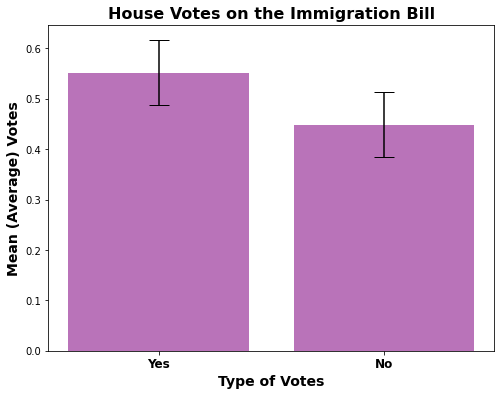

In [19]:
# Create an error bars bar chart:
house_votes = ['Yes', 'No']
x_pos = np.arange(len(house_votes))
h_means = [yes_mean, no_mean]
moe = [yes_moe, no_moe]

fig, ax = plt.subplots(facecolor='white', figsize=(8, 6))
ax.bar(house_votes, h_means, yerr=moe, align='center', ecolor='black', 
       capsize=10, color='purple', alpha=.55)
ax.set_xlabel('Type of Votes', fontsize=14, fontweight='bold')
ax.set_xticks(house_votes)
ax.set_xticklabels(['Yes', 'No'], fontsize=12, fontweight='bold')
ax.set_ylabel('Mean (Average) Votes', fontsize=14, fontweight='bold')
# ax.set_yticklabels(h_means, fontsize=12, fontweight='bold')
ax.set_title('House Votes on the Immigration Bill', fontsize=16, 
             fontweight='bold');

### Part 2B:

Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:

   - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)

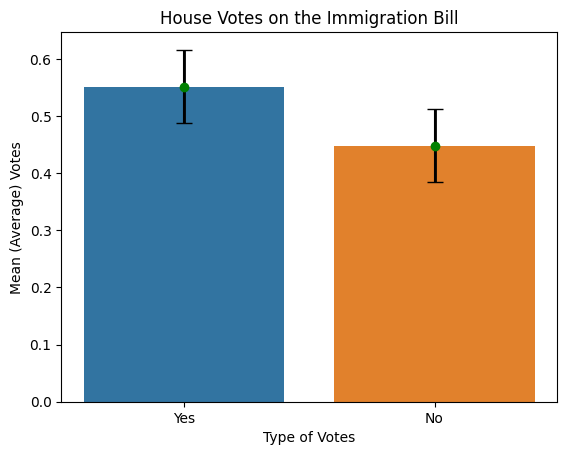

In [20]:
# Create a barplot with error bars using Seaborn:
plt.style.use('default')
sns.set_context(font_scale=2, rc={'font.size':10})
ax = sns.barplot(x=house_votes, y=h_means, yerr=moe, ci=.95)
ax.errorbar(house_votes, h_means, yerr=moe, ecolor='black', capsize=6, fmt='o', 
            c='green', elinewidth=2)
ax.set_title('House Votes on the Immigration Bill')
ax.set_xlabel('Type of Votes')
ax.set_ylabel('Mean (Average) Votes');

### Part 2C:

Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:

   - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)

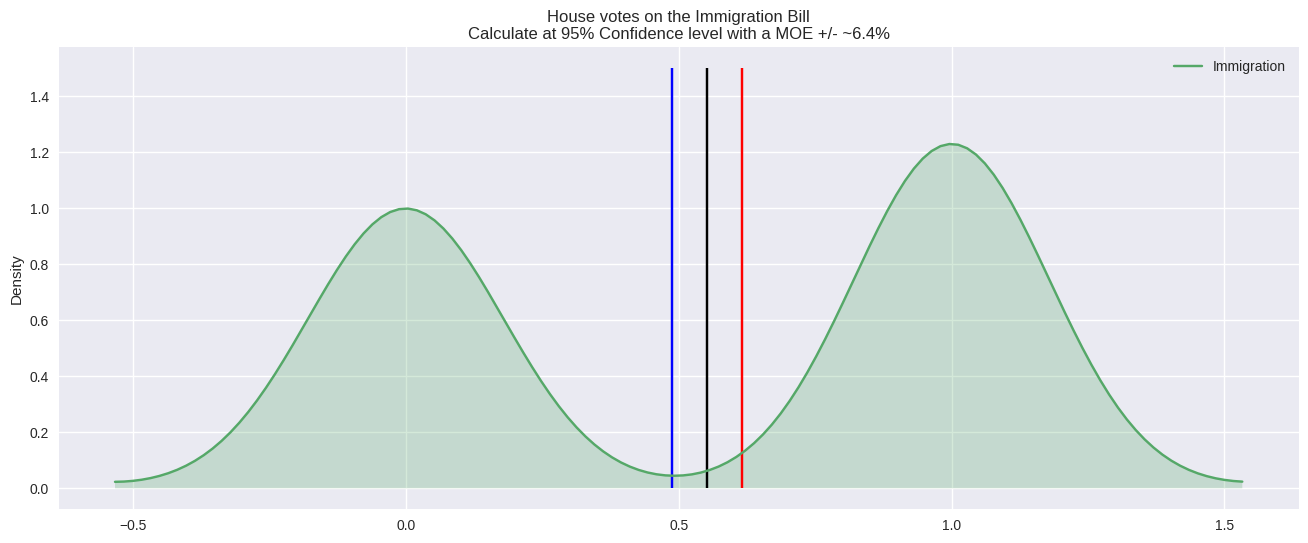

In [22]:
CI = confidence_interval(house['Immigration'])

plt.style.use('seaborn')
plt.figure(figsize=(16,6), facecolor='white')
house['Immigration'].plot(kind='density', yerr=house_moe, alpha=.0, label='')
sns.kdeplot(house['Immigration'], shade=True)
plt.vlines(CI[1], ymin=0, ymax=1.5, colors='blue', label='Lower Limit')
plt.vlines(CI[0], ymin=0, ymax=1.5, colors='black', label='Mean')
plt.vlines(CI[2], ymin=0, ymax=1.5, colors='red', label='Upper Limit')
plt.title('House votes on the Immigration Bill\nCalculate at 95% Confidence level with a MOE +/- ~6.4%');

### Part 2D:

Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:

   - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### Part 3:

In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).

- Bayesian Statistics:
  - Uses prior (posterior) probability data to determine current probability.
  - Their probability is based on plausability of a situation or event mostly.
  - Can give you a probability based on a small sample due to using prior data to calculate the probability.
  - Has to be run multiple times using the prior probabilty to get to your Confidence Interval.
  - Constently changing because it updates as soon as something changes.

- Frequentist Statistics:
  - Uses a sample dataset to determine the probability of an event occuring.
  - Probabilty is based on a random sample dataset of the population.
  - Need to have a large dataset to get an accurate probability rate.
  - The underlying parameters are fixed and remain constant through the testing.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!